# Steps involved in the Time Seris Analysis
    Importing Libraries
    Extracting Required Features from Dataframe
    Stationarity
    ACF and PACF plot
    ARIMA Modeling
    Sarimax Modeling
    Arimax Modeling

## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [4]:
ogdf = pd.read_excel('D:/UpGrad/Cult Fit Project/Solution/Outlier_cleaned_classes.xlsx')
ogdf.head()

,ActivitySiteID,ActivityDescription,BookingEndDateTime (Month / Day / Year),BookingStartTime,MaxBookees,Number Booked,Price (INR),Activity,Day,Week,Month,Occupancy,Revenue
0,HXP,20-20-20 2.45pm-3.45pm,2018-04-08,14:45:00,25,12,499,20-20-20,Sunday,14,4,0.48,5988
1,HXP,20-20-20 2.45pm-3.45pm,2018-04-15,14:45:00,25,15,499,20-20-20,Sunday,15,4,0.60,7485
2,HXP,20-20-20 2.45pm-3.45pm,2018-04-22,14:45:00,25,14,499,20-20-20,Sunday,16,4,0.56,6986
3,HXP,20-20-20 2.45pm-3.45pm,2018-04-29,14:45:00,25,9,499,20-20-20,Sunday,17,4,0.36,4491
4,HXP,20-20-20 2.45pm-3.45pm,2018-05-06,14:45:00,25,7,499,20-20-20,Sunday,18,5,0.28,3493


## Extracting Required Features from Dataframe

In [6]:
# extracting Date and Number Booked and renaming the column name
df = ogdf[['BookingEndDateTime (Month / Day / Year)','Number Booked']]
df = df.rename(columns={'BookingEndDateTime (Month / Day / Year)':'Date','Number Booked':'Bookings'})
df = df.set_index('Date') # setting Date as Index

In [7]:
df.head()

,Bookings
Date,
2018-04-08,12
2018-04-15,15
2018-04-22,14
2018-04-29,9
2018-05-06,7


In [8]:
#Grouping the Date by calculating sum of Bookings
df = df.groupby('Date')['Bookings'].sum().to_frame()
df.head()

,Bookings
Date,
2018-04-01,223
2018-04-02,254
2018-04-03,754
2018-04-04,835
2018-04-05,626


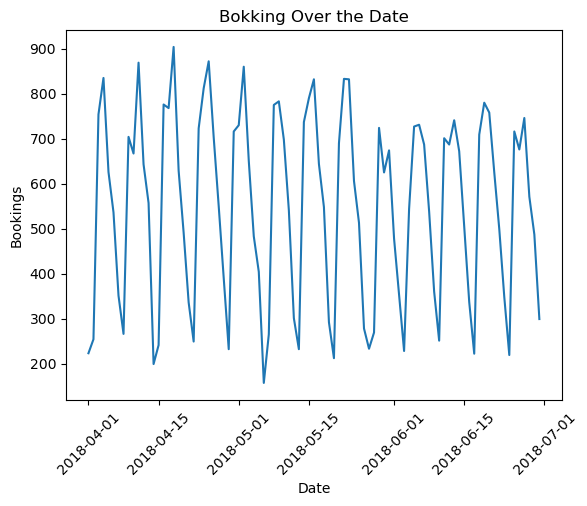

In [9]:
# checking the Time line and trend of Booking over month
plt.plot(df)
plt.title('Bokking Over the Date')
plt.xlabel('Date')
plt.ylabel('Bookings')
plt.xticks(rotation=45)
plt.show()

Observation:
            
            Booking has sesaonality at week level
            Looking at graphs tere is stable vairaince in data
            We will be forther testing the stationary in the daya

## Stationary

In [12]:
# checking adfuller
result = adfuller(df['Bookings'])
result

(-2.475032083254819,
 0.12166807056304185,
 6,
 84,
 {'1%': -3.510711795769895,
  '5%': -2.8966159448223734,
  '10%': -2.5854823866213152},
 953.5333762162895)

In [13]:
# making Dfuller result redable 
def adfuller_test(bookings):
    result = adfuller(bookings)
    labels = ['Adf Stats', 'p-value','Lag Usd','Obesrvation used']
    for values, labels in zip(result,labels):
        print(labels, ' : ', values)
    if result[1] <= 0.05:
        print('it is stationary')
    else:
        print('Not Stationary')

In [14]:
adfuller_test(df['Bookings'])

Adf Stats  :  -2.475032083254819
p-value  :  0.12166807056304185
Lag Usd  :  6
Obesrvation used  :  84
Not Stationary


In [15]:
# Making the Feature Stationary by differncing
df['Diff_1_Bookings'] = df['Bookings'] - df['Bookings'].shift(7)  # & because seasonality is occured weekly
df.head()

,Bookings,Diff_1_Bookings
Date,,
2018-04-01,223,NaN
2018-04-02,254,NaN
2018-04-03,754,NaN
2018-04-04,835,NaN
2018-04-05,626,NaN


In [16]:
# checking Adfukker again
adfuller_test(df['Diff_1_Bookings'].dropna())

Adf Stats  :  -4.235508130315997
p-value  :  0.0005734106984190211
Lag Usd  :  6
Obesrvation used  :  77
it is stationary


The Dataset ist Stationary. We will Proceed to get value for p,d,q in ARIMA model, d is the differnce and we have did it once so d = 1

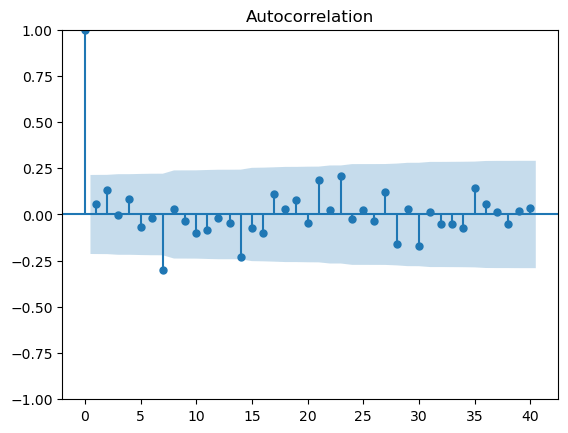

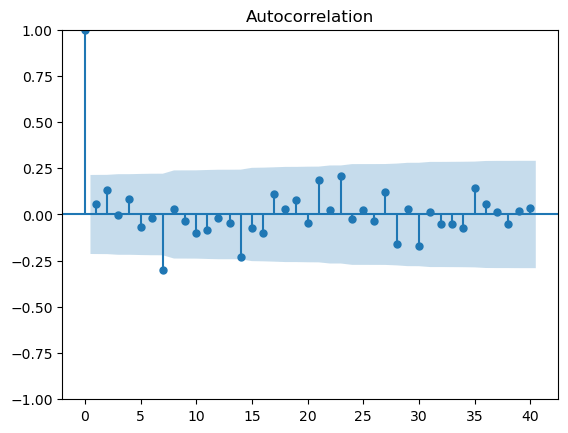

In [18]:
#ploting Acf
plot_acf(df['Diff_1_Bookings'].dropna(),lags=40)

Looking at the acf plot we can consider q value as 0 or 1 we will try using both and compare AIC BIC value

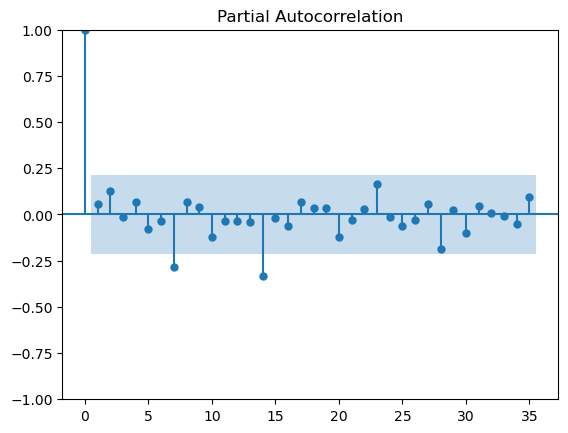

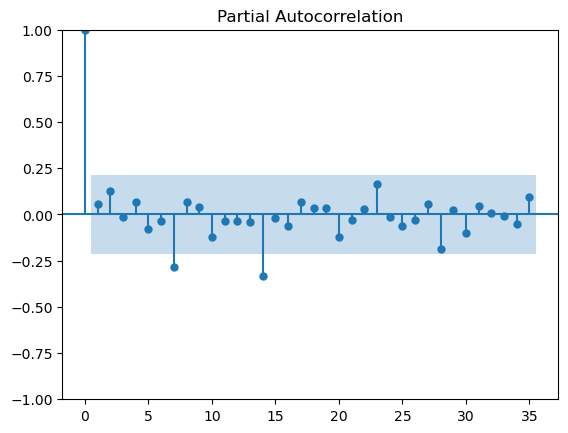

In [20]:
# Ploting pacf
plot_pacf(df['Diff_1_Bookings'].dropna(),lags=35)

Looking at the pacf plot we can consider p value as 0 or 1 we will try using both and compare AIC BIC value

## ARIMA Modeling

In [23]:
result = ARIMA(df['Bookings'].dropna(), order= (0,1,0)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Bookings   No. Observations:                   91
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -614.139
Date:                Thu, 04 Dec 2025   AIC                           1230.279
Time:                        15:19:46   BIC                           1232.779
Sample:                    04-01-2018   HQIC                          1231.287
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.94e+04   6710.527      7.361      0.000    3.62e+04    6.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):                20.69
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             1.16
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predicting Arima

In [26]:
df['forecast'] = result.predict(start='2018-06-1',end='2018-06-30')

Text(0.5, 1.0, 'Bookings')

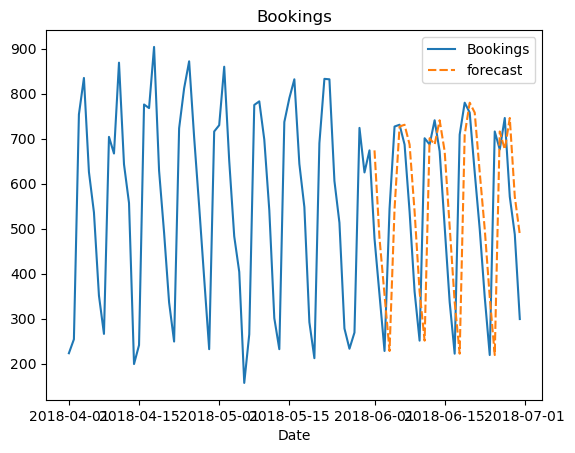

In [27]:
# Ploting Graphs
sns.lineplot(df[['Bookings','forecast']])
plt.title('Bookings')

Observation:

            After running all possibilites of value p,d,q best AIC BIC score is returned with p and q value 0

## SARIMA Model

In [30]:
result2 = SARIMAX(df['Bookings'],order=(0,1,0),seasonal_order=(0,1,0,7)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Bookings   No. Observations:                   91
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 7)   Log Likelihood                -540.777
Date:                           Thu, 04 Dec 2025   AIC                           1083.555
Time:                                   15:19:47   BIC                           1085.973
Sample:                               04-01-2018   HQIC                          1084.526
                                    - 06-30-2018                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.669e+04   2720.516      9.811      0.000    2.14e+04     3.2e+04
===================================================================================
Ljung-Box (L1) (Q):                  25.83   Jarque-Bera (JB):                24.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Predicting Sarimax

In [33]:
df['forecast_s'] = result2.predict(start='2018-06-1',end='2018-06-30')

Text(0.5, 1.0, 'Bookings')

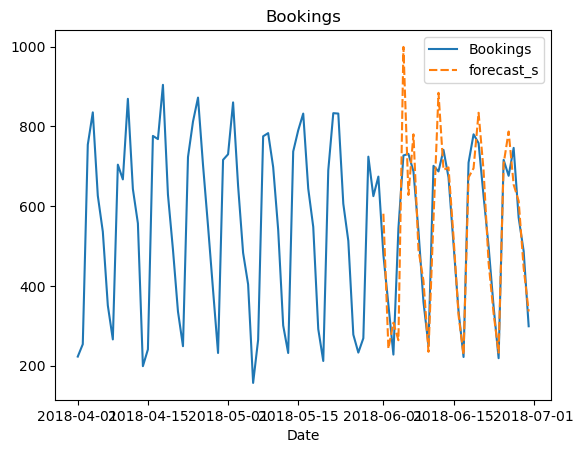

In [34]:
sns.lineplot(df[['Bookings','forecast_s']])
plt.title('Bookings')

In [35]:
pred = result.forecast(steps=30)
pred2 = result2.forecast(steps=30)

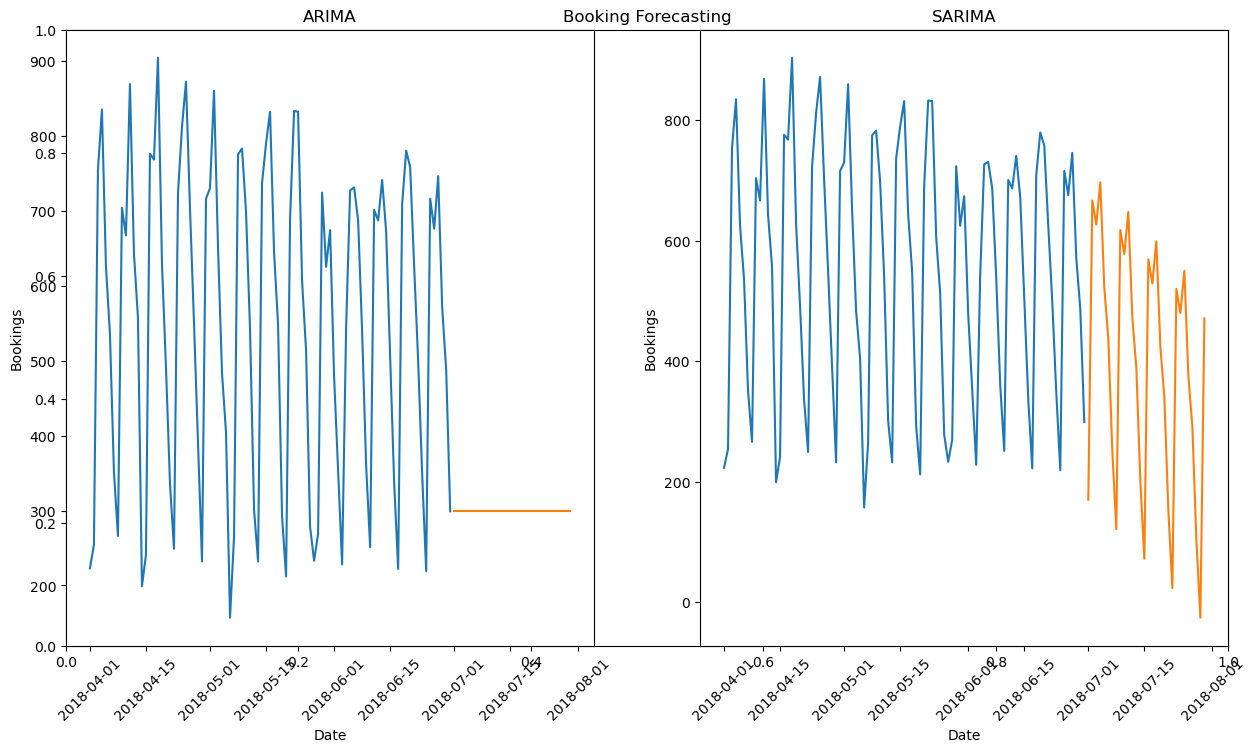

In [36]:
plt.figure(figsize=(15,8))
plt.title('Booking Forecasting')
plt.subplot(1,2,1)
plt.title('ARIMA')
sns.lineplot(df['Bookings'])
sns.lineplot(pred)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
plt.title('SARIMA')
sns.lineplot(df['Bookings'])
sns.lineplot(pred2)
plt.xticks(rotation=45)
plt.show()

### Evaluation Metrices

In [38]:
# Evaluating using metrecis
newdf = df.dropna()
# MSE of Arima
mean_squared_error(newdf['Bookings'],newdf['forecast'])

39755.833333333336

In [39]:
# MSE of Samrima
mean_squared_error(newdf['Bookings'],newdf['forecast_s'])

10426.299999999917

In [40]:
# RMSE of Arima
np.sqrt(mean_squared_error(newdf['Bookings'],newdf['forecast']))

199.38864895809223

In [41]:
# RMSE of Sarima
np.sqrt(mean_squared_error(newdf['Bookings'],newdf['forecast_s']))

102.10925521224762

In [42]:
# MAPE of Arima
mean_absolute_error(newdf['Bookings'], newdf['forecast'])

np.mean(np.abs((newdf['Bookings'] - newdf['forecast']) / newdf['Bookings'])) * 100

32.85108799658536

In [43]:
# MAPE of Srima
mean_absolute_error(newdf['Bookings'], newdf['forecast_s'])

np.mean(np.abs((newdf['Bookings'] - newdf['forecast_s']) / newdf['Bookings'])) * 100

13.86718396490522

## ARIMAX Model

In [45]:
# Selecting Features
arimax_df = ogdf[['ActivitySiteID','BookingEndDateTime (Month / Day / Year)','MaxBookees','Number Booked','Price (INR)','Day','Occupancy']]

In [46]:
arimax_df = arimax_df.rename(columns={'BookingEndDateTime (Month / Day / Year)':'Date','Number Booked':'Bookings'})
arimax_df = arimax_df.set_index('Date') # setting Date as Index

In [47]:
cat = arimax_df.describe(include='object').columns

In [48]:
cat_df = pd.get_dummies(arimax_df[cat],drop_first=True,dtype=int) # converting catogarical features to Numeric

In [49]:
arimax_df = arimax_df.merge(cat_df, on='Date')
arimax_df = arimax_df.drop(cat,axis=1)

In [50]:
# Gruping the Dates 
arimax_df = (
    arimax_df.groupby('Date')
      .agg({
          'Day_Sunday':'sum',
          'Day_Sunday':'sum',
          'Day_Monday':'sum',
          'Day_Saturday':'sum',
          'Day_Thursday':'sum',
          'Day_Tuesday':'sum',
          'Day_Wednesday':'sum',
          'ActivitySiteID_NBL':'sum',
          'ActivitySiteID_SBP':'sum',
          'ActivitySiteID_TSC':'sum',
          'ActivitySiteID_HXP':'sum',
          'Bookings': 'sum',        # total bookings per date
          'MaxBookees': 'max',      # capacity that day
          'Price (INR)': 'mean',    # average price that day
          'Occupancy': 'mean'       # average occupancy that day
      }))

In [51]:
cols = [x for x in arimax_df.columns if x not in 'Bookings'] # Features Except Bookings

In [52]:
# Scaling the exogenous Features using Standard Scaler
scaler = StandardScaler()
arimax_df[cols] = scaler.fit_transform(arimax_df[cols])

In [53]:
res = ARIMA(endog=arimax_df['Bookings'],exog=arimax_df[cols],order=(0,1,0)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [54]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Bookings   No. Observations:                   91
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -789.950
Date:                Thu, 04 Dec 2025   AIC                           1607.901
Time:                        15:19:49   BIC                           1642.898
Sample:                    04-01-2018   HQIC                          1622.014
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Day_Sunday           409.3630    551.865      0.742      0.458    -672.273    1490.999
Day_Monday          2077.9922    431.231      4.819      0.000    1232.794    2923.190
Day_Saturday         854.1958    458.280      1.864      0.062     -44.016    1752.408
Day_Thursday        1102.5959    450.815      2.446      0.014     219.014    1986.178
Day_Tuesday         2476.5213    408.304      6.065      0.000    1676.260    3276.783
Day_Wednesday       2189.4793    626.785      3.493      0.000     961.003    3417.956
ActivitySiteID_NBL  1198.8889    669.947      1.790      0.074    -114.183    2511.960
ActivitySiteID_SBP    95.0627    647.135      0.147      0.883   -1173.298    1363.424
ActivitySiteID_TSC  5576.0132   1223.730      4.557      0.000    3177.547    7974.479
ActivitySiteID_HXP  5366.7472    929.095      5.776      0.000    3545.755    7187.739
MaxBookees           137.8194    232.690      0.592      0.554    -318.244     593.883
Price (INR)         -129.3382    427.801     -0.302      0.762    -967.812     709.136
Occupancy            700.8365    284.946      2.460      0.014     142.352    1259.321
sigma2              2.474e+06   3.68e+05      6.719      0.000    1.75e+06     3.2e+06
===================================================================================
Ljung-Box (L1) (Q):                  19.65   Jarque-Bera (JB):                19.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                            -0.54
Prob(H) (two-sided):                  0.55   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
arimax_df['forecast'] = res.predict(start='2018-06-1',end='2018-06-30')

Text(0.5, 1.0, 'Bookings')

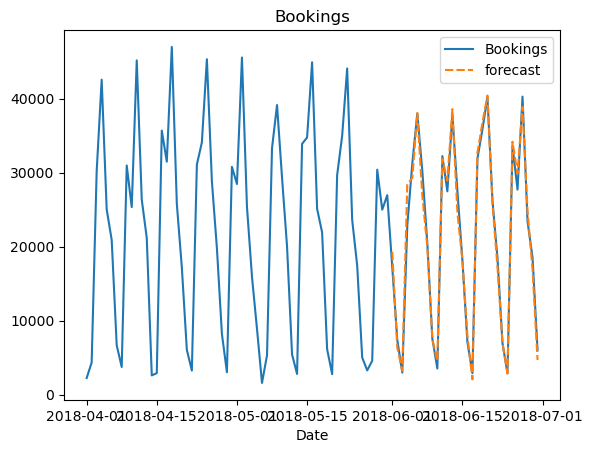

In [56]:
# Ploting The line Graph of orginnal vs Predicted Bookings
sns.lineplot(arimax_df[['Bookings','forecast']])
plt.title('Bookings')

### Evaluation

In [58]:
msedf = arimax_df.dropna()

In [59]:
# MSE of Arimax
mean_squared_error(msedf['Bookings'],msedf['forecast'])

2738345.6459317757

In [60]:
# RMSE of Arimax
np.sqrt(mean_squared_error(msedf['Bookings'],msedf['forecast']))

1654.7947443510254

In [61]:
# MAPE of Arimax
mean_absolute_error(msedf['Bookings'], msedf['forecast'])

np.mean(np.abs((msedf['Bookings'] - msedf['forecast']) / msedf['Bookings'])) * 100

7.851963857178092

Observation:

            Prediction using Arima gives nearly correct prediction on see data but on unseen data it shows flat bookings of 300 for forecasted 3 months
            while Sarima model considering seasonality, prediction nd forcast sfluctation between 1000 and 300 . moreover model shows future decrease in booking
            Arimax Model has Predicted most Accurate than Arima and Sarimax, When evaluated by Mean Absoulte Percentage e\Error Arimax Model has Least percentage of 7.85 followed by Sarimax i.e 13.87
            We can say that these two models are better than Arima for Demand forecasting